# ACE2 & SCA Analysis

Relevant links:
- cBioPortal TARGET CN Segment visualization: https://www.cbioportal.org/study/cnSegments?id=nbl_target_2018_pub
- cBioPortal Segmented Data Format: https://docs.cbioportal.org/5.1-data-loading/data-loading/file-formats#discrete-copy-number-data
- NCI Copy Number Segmentation file description: https://docs.gdc.cancer.gov/Data/Bioinformatics_Pipelines/CNV_Pipeline/


In [2]:
import pandas as pd
from ipynb.fs.full.TARGET_Analysis_Functions import *

In [3]:
cna_data = pd.read_csv('../nbl_target_2018_pub/data_cna_hg19_copy.txt',  sep='\t')

In [4]:
cna_data

,ID,chrom,loc.start,loc.end,num.mark,seg.mean
0,TARGET-30-PAAPFA-01,1,742429,1096336,20,0.1090
1,TARGET-30-PAAPFA-01,1,1109721,1495118,24,0.4455
2,TARGET-30-PAAPFA-01,1,1498897,1771080,6,-0.4355
3,TARGET-30-PAAPFA-01,1,1782971,3681587,355,0.3525
4,TARGET-30-PAAPFA-01,1,3685860,12758455,1946,0.1499
...,...,...,...,...,...,...
13419,TARGET-30-PASLGS-01,X,139360526,154582606,1802,-0.0100
13420,TARGET-30-PASLGS-01,X,110851122,110851339,1,-0.0100
13421,TARGET-30-PASLGS-01,X,110894171,118874411,945,-0.0100
13422,TARGET-30-PASLGS-01,X,118891019,139320535,2418,-0.0100


In [5]:
print("Number of samples with CNA data: " + str(len(cna_data['ID'].unique())))

Number of samples with CNA data: 59


# Chromosome 1p loss analysis

In [6]:
#Filter only data for chromosome 1p
ch1_data = cna_data.loc[cna_data['chrom']=='1']
ch1p_data = ch1_data.loc[ch1_data['loc.end']<121500000] #coordinate 121500000 is the start of the centrosome

In [7]:
#Find all loci with log2-ratio < -0.2
ch1p_loss = ch1p_data[ch1p_data['seg.mean']<-0.2]

In [8]:
ch1p_loss

,ID,chrom,loc.start,loc.end,num.mark,seg.mean
2,TARGET-30-PAAPFA-01,1,1498897,1771080,6,-0.4355
5,TARGET-30-PAAPFA-01,1,12783336,12836483,11,-0.5778
7,TARGET-30-PAAPFA-01,1,52828775,52836622,5,-0.8003
198,TARGET-30-PACRYY-01,1,111180501,111189246,3,-0.8481
441,TARGET-30-PACUGP-01,1,9909594,10489709,59,-0.6572
...,...,...,...,...,...,...
13147,TARGET-30-PASLGS-01,1,35498491,35498608,2,-1.0888
13149,TARGET-30-PASLGS-01,1,66974753,66989285,5,-0.5343
13151,TARGET-30-PASLGS-01,1,71150238,71171490,9,-0.3787
13153,TARGET-30-PASLGS-01,1,72549855,72571413,2,-1.7081


In [9]:
#Only include samples that have substantial CNV loss across the chromosome (>10Mb affected)
ch1p_loss_filtered = pd.DataFrame(columns=ch1p_loss.columns)
for sample in ch1p_loss['ID'].unique():
    sample_df = ch1p_loss.loc[ch1p_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    print(sample + " total loss length: " + str(total_loss_length))
    if(total_loss_length >= 10000000):
        ch1p_loss_filtered = ch1p_loss_filtered.append(ch1p_loss[ch1p_loss['ID'] == sample])

TARGET-30-PAAPFA-01 total loss length: 333177
TARGET-30-PACRYY-01 total loss length: 8745
TARGET-30-PACUGP-01 total loss length: 17340460
TARGET-30-PADIEY-01 total loss length: 635567
TARGET-30-PADLJN-01 total loss length: 95731
TARGET-30-PADLPR-01 total loss length: 74880585
TARGET-30-PADMGA-01 total loss length: 20799
TARGET-30-PADPHP-01 total loss length: 7286
TARGET-30-PADUYJ-01 total loss length: 112069277
TARGET-30-PAKADI-01 total loss length: 401862
TARGET-30-PAKAFK-01 total loss length: 21739423
TARGET-30-PALNMX-01 total loss length: 4832
TARGET-30-PAPZYP-01 total loss length: 84063514
TARGET-30-PARABN-01 total loss length: 4897
TARGET-30-PARACM-01 total loss length: 20738575
TARGET-30-PARAHE-01 total loss length: 40590350
TARGET-30-PARDUJ-01 total loss length: 4696
TARGET-30-PAREGK-01 total loss length: 3897
TARGET-30-PARGDJ-01 total loss length: 27247763
TARGET-30-PARGUX-01 total loss length: 7812043
TARGET-30-PARHYL-01 total loss length: 5905
TARGET-30-PARIKF-01 total loss l

In [10]:
ch1p_loss_filtered

,ID,chrom,loc.start,loc.end,num.mark,seg.mean
441,TARGET-30-PACUGP-01,1,9909594,10489709,59,-0.6572
442,TARGET-30-PACUGP-01,1,10489795,20927313,2159,-0.3206
443,TARGET-30-PACUGP-01,1,20941716,21365118,36,-0.8063
445,TARGET-30-PACUGP-01,1,21504250,21505057,1,-0.2448
446,TARGET-30-PACUGP-01,1,21508003,21872613,108,-0.2448
...,...,...,...,...,...,...
12651,TARGET-30-PASJYB-01,1,40799336,42622990,350,-0.4957
12653,TARGET-30-PASJYB-01,1,103941535,103966748,5,-0.4654
12918,TARGET-30-PASKJX-01,1,758311,12769266,2683,-0.3141
12919,TARGET-30-PASKJX-01,1,12841261,24740368,2658,-0.3141


In [11]:
#Compare ch1p loss samples identified from algorithm with samples identified manually
manual_calls = pd.read_csv('../TARGET_SCA_Identification.csv')
ch1p_loss_samples = ch1p_loss_filtered['ID'].unique()
manual_ch1p_loss_calls = manual_calls[manual_calls['1p loss']==1]['Sample']
print("Samples called by algorithm but not manually: " + str(set(ch1p_loss_samples.tolist()) - set(manual_ch1p_loss_calls.tolist())))
print("Samples called manually but not by algorithm: " + str(set(manual_ch1p_loss_calls.tolist()) - set(ch1p_loss_samples.tolist())))




Samples called by algorithm but not manually: {'TARGET-30-PAKAFK-01', 'TARGET-30-PADLPR-01'}
Samples called manually but not by algorithm: {'TARGET-30-PASBEN-01'}


In [12]:
#Remove samples called by algorithm but not manually
ch1p_loss_filtered = ch1p_loss_filtered[ch1p_loss_filtered['ID'] != 'TARGET-30-PAKAFK-01']
ch1p_loss_filtered = ch1p_loss_filtered[ch1p_loss_filtered['ID'] != 'TARGET-30-PADLPR-01']

#Add samples called manually but not by algorithm
ch1p_loss_filtered = ch1p_loss_filtered.append(ch1p_loss[ch1p_loss['ID'] == 'TARGET-30-PASBEN-01'])

In [13]:
#Stratify samples based on chromosome 1p deletion status
ch1p_loss_samples = ch1p_loss_filtered['ID'].unique()
ch1p_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch1p_loss_samples.tolist())

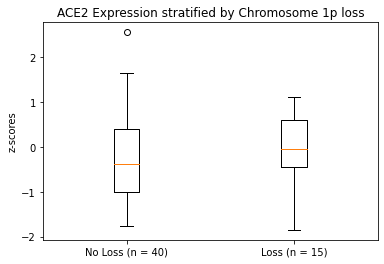

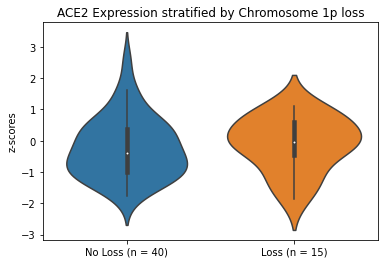

No Loss: median = -0.38339999999999996, mean = -0.22586750000000003, 95% CI = (-0.5235206506844001, 0.0717856506844001)
Loss: median = -0.0544, mean = -0.09810000000000002, 95% CI = (-0.5329750559949227, 0.3367750559949226)
Ttest_indResult(statistic=-0.45141974149127284, pvalue=0.6535288658899041)


In [14]:
#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch1p_non_loss_samples,ch1p_loss_samples],'Chromosome 1p loss','No Loss','Loss')

# Chromosome 11q loss analysis

In [15]:
#Filter only data for chromosome 11q
ch11_data = cna_data.loc[cna_data['chrom']=='11']
ch11q_data = ch11_data.loc[ch11_data['loc.start']>55700000] #coordinate 55700000 is the end of the centrosome

#Find all loci with log2-ratio < -0.2
ch11q_loss = ch11q_data[ch11q_data['seg.mean']<-0.2]

#Only include samples that have substantial CNV loss across the chromosome (>10Mb affected)
ch11q_loss_filtered = pd.DataFrame(columns=ch11q_loss.columns)
for sample in ch11q_loss['ID'].unique():
    sample_df = ch11q_loss.loc[ch11q_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch11q_loss_filtered = ch11q_loss_filtered.append(ch11q_loss[ch11q_loss['ID'] == sample])

In [16]:
#Compare ch11q loss samples identified from algorithm with samples identified manually
ch11q_loss_samples = ch11q_loss_filtered['ID'].unique()
manual_ch11q_loss_calls = manual_calls[manual_calls['11q loss']==1]['Sample']
print("Samples called by algorithm but not manually: " + str(set(ch11q_loss_samples.tolist()) - set(manual_ch11q_loss_calls.tolist())))
print("Samples called manually but not by algorithm: " + str(set(manual_ch11q_loss_calls.tolist()) - set(ch11q_loss_samples.tolist())))




Samples called by algorithm but not manually: set()
Samples called manually but not by algorithm: {'TARGET-30-PARHYL-01', 'TARGET-30-PARCWT-01', 'TARGET-30-PARXLM-01'}


In [17]:
#Add samples called manually but not by algorithm
ch11q_loss_filtered = ch11q_loss_filtered.append(ch11q_loss[ch11q_loss['ID'] == 'TARGET-30-PARCWT-01'])
ch11q_loss_filtered = ch11q_loss_filtered.append(ch11q_loss[ch11q_loss['ID'] == 'TARGET-30-PARXLM-01'])
ch11q_loss_filtered = ch11q_loss_filtered.append(ch11q_loss[ch11q_loss['ID'] == 'TARGET-30-PARHYL-01'])

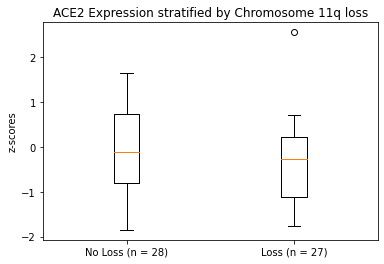

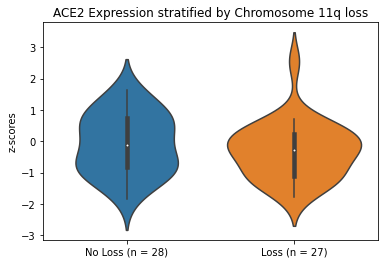

No Loss: median = -0.11435000000000001, mean = -0.08165, 95% CI = (-0.43637476044205487, 0.27307476044205486)
Loss: median = -0.2809, mean = -0.30444444444444446, 95% CI = (-0.6438386486835208, 0.034949759794631885)
Ttest_indResult(statistic=0.8884368504965121, pvalue=0.37832029949750223)


In [18]:
#Stratify samples based on chromosome 11q deletion status
ch11q_loss_samples = ch11q_loss_filtered['ID'].unique()
ch11q_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch11q_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch11q_non_loss_samples,ch11q_loss_samples],'Chromosome 11q loss','No Loss','Loss')

# Chromosome 17q gain analysis

In [19]:
#Filter only data for chromosome 17q
ch17_data = cna_data.loc[cna_data['chrom']=='17']
ch17q_data = ch17_data.loc[ch17_data['loc.start']>25800000] #coordinate 25800000 is the end of the centrosome

#Find all loci with log2-ratio > 0.2
ch17q_gain = ch17q_data[ch17q_data['seg.mean']>0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch17q_gain_filtered = pd.DataFrame(columns=ch17q_gain.columns)
for sample in ch17q_gain['ID'].unique():
    sample_df = ch17q_gain.loc[ch17q_gain['ID']==sample]
    total_gain_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_gain_length >= 10000000):
        ch17q_gain_filtered = ch17q_gain_filtered.append(ch17q_gain[ch17q_gain['ID'] == sample])

In [20]:
#Compare ch17q gain samples identified from algorithm with samples identified manually
ch17q_gain_samples = ch17q_gain_filtered['ID'].unique()
manual_ch17q_gain_calls = manual_calls[manual_calls['17q gain']==1]['Sample']
print("Samples called by algorithm but not manually: " + str(set(ch17q_gain_samples.tolist()) - set(manual_ch17q_gain_calls.tolist())))
print("Samples called manually but not by algorithm: " + str(set(manual_ch17q_gain_calls.tolist()) - set(ch17q_gain_samples.tolist())))




Samples called by algorithm but not manually: {'TARGET-30-PASKJX-01', 'TARGET-30-PALRIA-01', 'TARGET-30-PASFRV-01'}
Samples called manually but not by algorithm: {'TARGET-30-PARSHT-01'}


In [21]:
#Remove samples called by algorithm but not manually
ch17q_gain_filtered = ch17q_gain_filtered[ch17q_gain_filtered['ID'] != 'TARGET-30-PASKJX-01']
ch17q_gain_filtered = ch17q_gain_filtered[ch17q_gain_filtered['ID'] != 'TARGET-30-PASFRV-01']
ch17q_gain_filtered = ch17q_gain_filtered[ch17q_gain_filtered['ID'] != 'TARGET-30-PALRIA-01']

#Add samples called manually but not by algorithm
ch17q_gain_filtered = ch17q_gain_filtered.append(ch17q_gain[ch17q_gain['ID'] == 'TARGET-30-PASHT-01'])

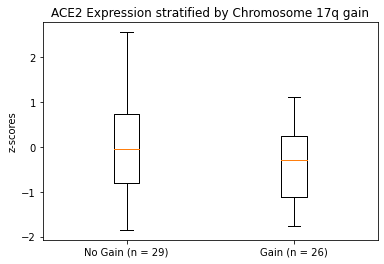

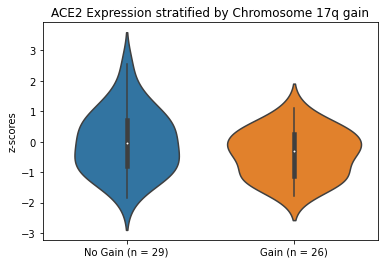

No Gain: median = -0.0383, mean = -0.012668965517241386, 95% CI = (-0.38691561728201473, 0.36157768624753195)
Gain: median = -0.3045, mean = -0.38995384615384615, 95% CI = (-0.6870812778251918, -0.09282641448250056)
Ttest_indResult(statistic=1.5237604156166282, pvalue=0.1335137256774766)


In [22]:
#Stratify samples based on chromosome 1p deletion status
ch17q_gain_samples = ch17q_gain_filtered['ID'].unique()
ch17q_non_gain_samples = set(cna_data['ID'].unique().tolist()) - set(ch17q_gain_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch17q_non_gain_samples,ch17q_gain_samples],'Chromosome 17q gain','No Gain','Gain')

# Chromosome 1p and 11q loss + Chromosome 17q gain

In [23]:
sca_samples = np.unique(np.concatenate((ch1p_loss_samples,ch11q_loss_samples,ch17q_gain_samples)))

In [24]:
non_sca_samples = set(cna_data['ID'].unique().tolist()) - set(sca_samples.tolist())

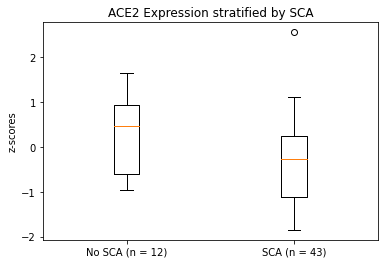

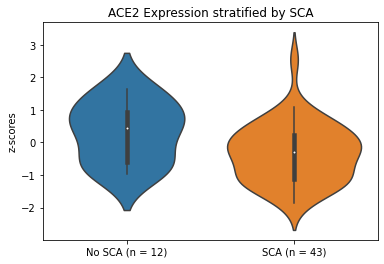

No SCA: median = 0.4546, mean = 0.3220083333333334, 95% CI = (-0.19736727440234808, 0.8413839410690149)
SCA: median = -0.2809, mean = -0.33419302325581396, 95% CI = (-0.5998797953727768, -0.06850625113885117)
Ttest_indResult(statistic=2.245694753091358, pvalue=0.028917263979268373)


In [25]:
compareExpression('ACE2',[non_sca_samples,sca_samples],'SCA','No SCA','SCA')

# Compare EFS in SCA samples stratified by ACE2 expression

In [26]:
#Find z-scores for sca samples
sca_columns = ['Hugo_Symbol','Entrez_Gene_Id'] + list(set(sca_samples).intersection(z_scores.columns))
sca_z_scores = z_scores[sca_columns]

In [27]:
sca_z_scores

,Hugo_Symbol,Entrez_Gene_Id,TARGET-30-PAAPFA-01,TARGET-30-PADLPR-01,TARGET-30-PASBEN-01,TARGET-30-PARNEE-01,TARGET-30-PARGUX-01,TARGET-30-PARMTT-01,TARGET-30-PASKJX-01,TARGET-30-PARJTB-01,...,TARGET-30-PARIKF-01,TARGET-30-PARCWT-01,TARGET-30-PADENF-01,TARGET-30-PADIEY-01,TARGET-30-PAPZYP-01,TARGET-30-PARGDJ-01,TARGET-30-PARXLM-01,TARGET-30-PARIKT-01,TARGET-30-PASFRV-01,TARGET-30-PASLGS-01
0,A1BG,1.0,-0.5221,1.1088,-1.3322,0.5255,-0.7575,0.7443,0.8147,-0.4013,...,-0.2003,-2.2772,0.1731,0.5242,-1.0532,-0.4560,9.7891,0.6650,-0.5115,-1.5554
1,A1BG-AS,503538.0,-0.1166,0.1983,-1.2690,0.1035,-1.1769,0.7478,-0.2644,-0.4837,...,0.1267,-0.2128,-0.2636,1.7110,-1.0179,-0.7283,0.0904,0.4639,0.6063,0.4799
2,A1CF,29974.0,0.0926,-0.3199,-0.9930,-0.3545,-1.0870,-0.0883,-0.3754,-0.0028,...,-0.5914,-1.5919,0.6134,0.4002,-0.3305,-0.7302,9.1947,0.3401,-0.0196,-0.5165
3,A2LD1,87769.0,-0.8822,0.1135,-0.3511,-0.3537,-0.7548,0.2267,-0.2247,-0.0203,...,-0.3512,-1.0726,-0.3022,0.0063,-0.7540,-0.0600,0.6348,2.0902,0.0043,-1.0429
4,A2M,2.0,1.1429,-0.1283,0.4769,-1.0028,0.7565,-0.6153,-1.0047,-0.3098,...,-0.7907,1.4090,0.1766,0.0835,0.7453,1.1220,2.3695,0.0680,0.6117,0.0620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23429,ZYX,7791.0,0.6176,-0.3308,0.2158,0.8534,0.5268,-1.5803,-0.1220,-1.1832,...,-0.3058,0.1364,-0.6432,-0.9149,-0.3924,0.7201,0.6050,0.6903,-0.9146,-0.2482
23430,ZZEF1,23140.0,-0.0514,-0.3712,0.9962,-0.2385,1.3047,-0.1032,0.6784,1.2868,...,0.5272,0.9819,1.5874,0.1749,0.1024,1.2581,-0.6070,-0.4519,0.8745,0.5991
23431,ZZZ3,26009.0,-0.9412,-0.8957,-0.2460,-0.1664,0.4341,-0.2007,0.8810,0.9589,...,-0.7474,1.2448,1.0467,-0.6206,-0.8886,0.3437,-0.9956,-0.4057,1.0393,1.1058
23432,psiTPTE22,387590.0,1.0795,-0.3662,0.3591,1.3012,0.3224,0.1001,0.6491,0.1357,...,1.0334,2.2171,-0.6513,-1.2599,1.8960,0.5122,-0.3110,0.2545,-0.0930,-0.7222


In [28]:
#Obtain the ACE2 z-scores in sca samples
ACE2_sca_z_scores = sca_z_scores.loc[sca_z_scores['Hugo_Symbol']=='ACE2'].iloc[:,2:].transpose()
#Find samples for which the z-scores are < -0.5
low_ACE2_sca_samples = ACE2_sca_z_scores.loc[ACE2_sca_z_scores.iloc[:,0] < -0.5].index
#Find samples for which z-scores are between -0.5 and 0.5
intermediate_ACE2_sca_samples = ACE2_sca_z_scores.loc[ACE2_sca_z_scores.iloc[:,0] > -0.5]
intermediate_ACE2_sca_samples = intermediate_ACE2_sca_samples.loc[intermediate_ACE2_sca_samples.iloc[:,0] < 0.5].index
#Find samples for which the z-scores are > 0.5
high_ACE2_sca_samples = ACE2_sca_z_scores.loc[ACE2_sca_z_scores.iloc[:,0] > 0.5].index



Low v.s. Intermediate: t-test independent samples, P_val=3.338e-01 stat=9.800e-01
Intermediate v.s. High: t-test independent samples, P_val=8.671e-01 stat=-1.692e-01
Low v.s. High: t-test independent samples, P_val=5.956e-01 stat=5.386e-01


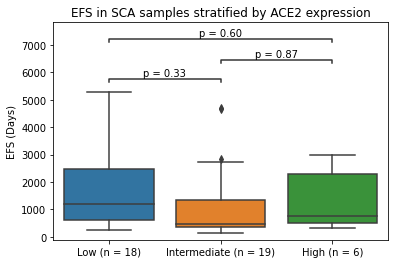

Low: median = 1191.5, mean = 1708.1666666666667, 95% CI = (1016.1689087011222, 2400.164424632211)
Intermediate: median = 455.0, mean = 1233.2105263157894, 95% CI = (581.1973123525822, 1885.2237402789965)
High: median = 762.5, mean = 1344.0, 95% CI = (389.13647003621907, 2298.863529963781)


In [30]:
compareEFS2([low_ACE2_sca_samples,intermediate_ACE2_sca_samples,high_ACE2_sca_samples], 'EFS in SCA samples stratified by ACE2 expression', ['Low','Intermediate','High'],'t-test_ind')



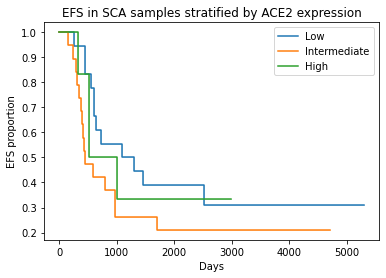

Log Rank Test between Low and Intermediate


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.10 0.15      2.77

Log Rank Test between Low and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.11 0.74      0.44

Log Rank Test between Intermediate and High


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.60 0.44      1.18

In [31]:
kaplanmeierEFS2([low_ACE2_sca_samples,intermediate_ACE2_sca_samples,high_ACE2_sca_samples], 'EFS in SCA samples stratified by ACE2 expression', ['Low','Intermediate','High'])




# Chromosome 10 loss analysis

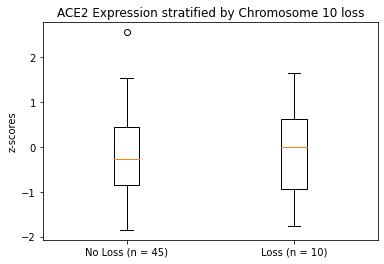

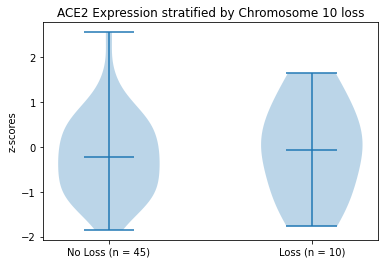

No Loss: median = -0.2675, mean = -0.21671111111111108, 95% CI = (-0.4806820533722305, 0.04725983115000837)
Loss: median = -0.0009500000000000064, mean = -0.07541999999999999, 95% CI = (-0.742214386488971, 0.5913743864889709)
Ttest_indResult(statistic=-0.4322514698057315, pvalue=0.6673123030658021)


In [119]:
#Filter only data for chromosome 10
ch10_data = cna_data.loc[cna_data['chrom']=='10']

#Find all loci with log2-ratio < -0.2
ch10_loss = ch10_data[ch10_data['seg.mean']<-0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch10_loss_filtered = pd.DataFrame(columns=ch10_loss.columns)
for sample in ch10_loss['ID'].unique():
    sample_df = ch10_loss.loc[ch10_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch10_loss_filtered = ch10_loss_filtered.append(ch10_loss[ch10_loss['ID'] == sample])
        
#Stratify samples based on chromosome 10 deletion status
ch10_loss_samples = ch10_loss_filtered['ID'].unique()
ch10_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch10_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch10_non_loss_samples,ch10_loss_samples],'Chromosome 10 loss','No Loss','Loss')

        
        
        

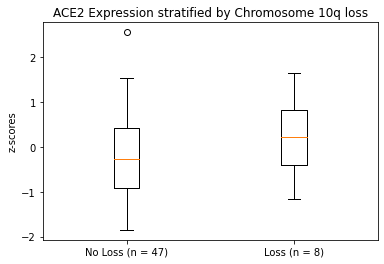

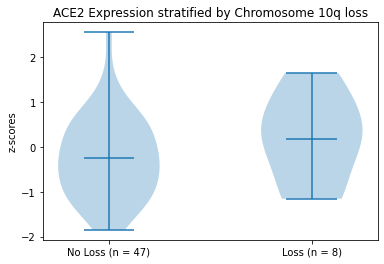

No Loss: median = -0.2809, mean = -0.2546978723404255, 95% CI = (-0.5156297241739318, 0.006233979493080799)
Loss: median = 0.2163, mean = 0.18307500000000004, 95% CI = (-0.5032306576605012, 0.8693806576605012)
Ttest_indResult(statistic=-1.2396544676479546, pvalue=0.22056424831585858)


In [120]:
#Filter only data for chromosome 10q
ch10q_data = ch10_data.loc[ch10_data['loc.start']>42300000] #coordinate 42300000 is the end of the centrosome

#Find all loci with log2-ratio < -0.2
ch10q_loss = ch10q_data[ch10q_data['seg.mean']<-0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch10q_loss_filtered = pd.DataFrame(columns=ch10q_loss.columns)
for sample in ch10q_loss['ID'].unique():
    sample_df = ch10q_loss.loc[ch10q_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch10q_loss_filtered = ch10q_loss_filtered.append(ch10q_loss[ch10q_loss['ID'] == sample])
        
#Stratify samples based on chromosome 10 deletion status
ch10q_loss_samples = ch10q_loss_filtered['ID'].unique()
ch10q_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch10q_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch10q_non_loss_samples,ch10q_loss_samples],'Chromosome 10q loss','No Loss','Loss')

        
        
        

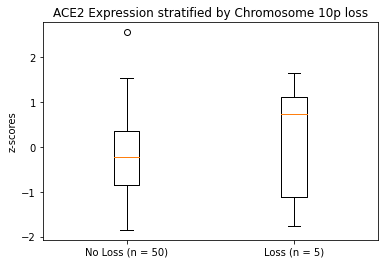

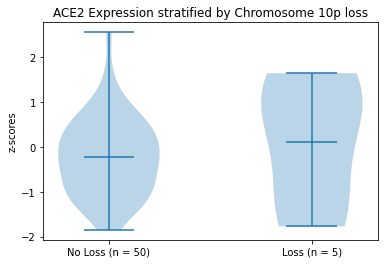

No Loss: median = -0.23270000000000002, mean = -0.22176, 95% CI = (-0.46335962318681, 0.019839623186809985)
Loss: median = 0.7244, mean = 0.11635999999999999, 95% CI = (-1.179919274927091, 1.412639274927091)
Ttest_indResult(statistic=-0.7739852879963528, pvalue=0.4423784111143586)


In [121]:
#Filter only data for chromosome 10p
ch10p_data = ch10_data.loc[ch10_data['loc.end']<38000000] #coordinate 38000000 is the start of the centrosome

#Find all loci with log2-ratio < -0.2
ch10p_loss = ch10p_data[ch10p_data['seg.mean']<-0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch10p_loss_filtered = pd.DataFrame(columns=ch10p_loss.columns)
for sample in ch10p_loss['ID'].unique():
    sample_df = ch10p_loss.loc[ch10p_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch10p_loss_filtered = ch10p_loss_filtered.append(ch10p_loss[ch10p_loss['ID'] == sample])
        
#Stratify samples based on chromosome 10 deletion status
ch10p_loss_samples = ch10p_loss_filtered['ID'].unique()
ch10p_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch10p_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch10p_non_loss_samples,ch10p_loss_samples],'Chromosome 10p loss','No Loss','Loss')

        
        
        

# Chromosome 4 loss analysis

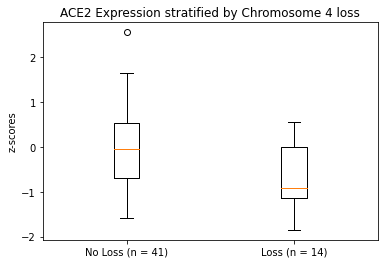

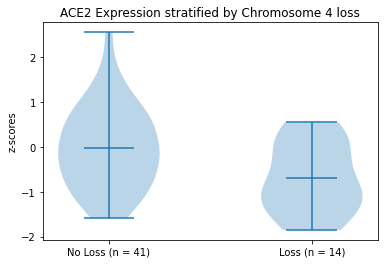

No Loss: median = -0.0544, mean = -0.01625121951219512, 95% CI = (-0.29693268250755034, 0.26443024348316013)
Loss: median = -0.9163, mean = -0.7028500000000001, 95% CI = (-1.1122740810981147, -0.29342591890188563)
Ttest_indResult(statistic=2.504357581554988, pvalue=0.015379334264358467)


In [122]:
#Filter only data for chromosome 4
ch_data = cna_data.loc[cna_data['chrom']=='4']

#Find all loci with log2-ratio < -0.2
ch_loss = ch_data[ch_data['seg.mean']<-0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch_loss_filtered = pd.DataFrame(columns=ch_loss.columns)
for sample in ch_loss['ID'].unique():
    sample_df = ch_loss.loc[ch_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch_loss_filtered = ch_loss_filtered.append(ch_loss[ch_loss['ID'] == sample])
        
#Stratify samples based on chromosome 10 deletion status
ch_loss_samples = ch_loss_filtered['ID'].unique()
ch_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch_non_loss_samples,ch_loss_samples],'Chromosome 4 loss','No Loss','Loss')

        
        
        

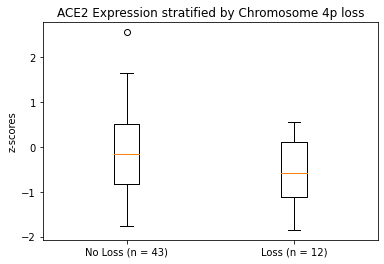

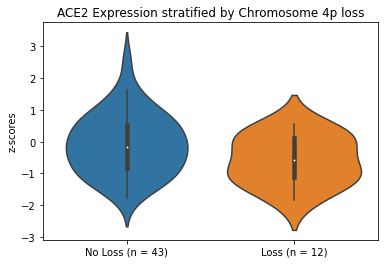

No Loss: median = -0.168, mean = -0.08352790697674416, 95% CI = (-0.3671363307864672, 0.20008051683297884)
Loss: median = -0.58825, mean = -0.5762083333333333, 95% CI = (-1.0078984933526887, -0.14451817331397793)
Ttest_indResult(statistic=1.6521377115386253, pvalue=0.10441956137157472)


In [32]:
#Filter only data for chromosome 4
ch_data = cna_data.loc[cna_data['chrom']=='4']

#Filter only data for chromosome 4p
ch_data = ch_data.loc[ch_data['loc.end']<48200000] #coordinate 48200000 is the start of the centrosome

#Find all loci with log2-ratio < -0.2
ch_loss = ch_data[ch_data['seg.mean']<-0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch_loss_filtered = pd.DataFrame(columns=ch_loss.columns)
for sample in ch_loss['ID'].unique():
    sample_df = ch_loss.loc[ch_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch_loss_filtered = ch_loss_filtered.append(ch_loss[ch_loss['ID'] == sample])
        
#Stratify samples based on chromosome 10 deletion status
ch_loss_samples = ch_loss_filtered['ID'].unique()
ch_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch_non_loss_samples,ch_loss_samples],'Chromosome 4p loss','No Loss','Loss')

        
        
        

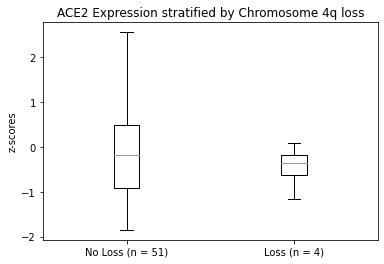

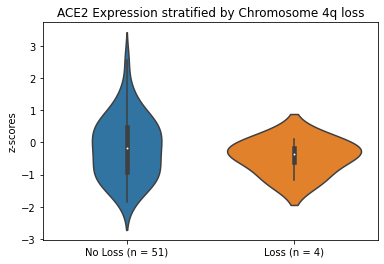

No Loss: median = -0.1743, mean = -0.17088235294117646, 95% CI = (-0.4323899887392556, 0.09062528285690272)
Loss: median = -0.36395, mean = -0.4478, 95% CI = (-0.9587587326775626, 0.06315873267756267)
Ttest_indResult(statistic=0.5711489228398172, pvalue=0.5703127851118381)


In [33]:
#Filter only data for chromosome 4
ch_data = cna_data.loc[cna_data['chrom']=='4']

#Filter only data for chromosome 4q
ch_data = ch_data.loc[ch_data['loc.start']>52700000] #coordinate 52700000 is the end of the centrosome

#Find all loci with log2-ratio < -0.2
ch_loss = ch_data[ch_data['seg.mean']<-0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch_loss_filtered = pd.DataFrame(columns=ch_loss.columns)
for sample in ch_loss['ID'].unique():
    sample_df = ch_loss.loc[ch_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch_loss_filtered = ch_loss_filtered.append(ch_loss[ch_loss['ID'] == sample])
        
#Stratify samples based on chromosome 10 deletion status
ch_loss_samples = ch_loss_filtered['ID'].unique()
ch_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch_non_loss_samples,ch_loss_samples],'Chromosome 4q loss','No Loss','Loss')

        
        
        

# Chromosome 12 gain analysis

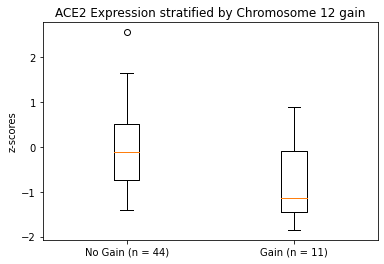

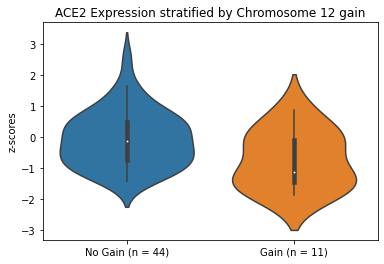

No Gain: median = -0.12614999999999998, mean = -0.055770454545454554, 95% CI = (-0.3183982119871279, 0.20685730289621884)
Gain: median = -1.1319, mean = -0.7320272727272726, 95% CI = (-1.2768640266119564, -0.18719051884258875)
Ttest_indResult(statistic=2.2410136334290507, pvalue=0.02923828895061316)


In [34]:
#Filter only data for chromosome 12
ch_data = cna_data.loc[cna_data['chrom']=='12']

#Find all loci with log2-ratio > 0.2
ch_loss = ch_data[ch_data['seg.mean']>0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch_loss_filtered = pd.DataFrame(columns=ch_loss.columns)
for sample in ch_loss['ID'].unique():
    sample_df = ch_loss.loc[ch_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch_loss_filtered = ch_loss_filtered.append(ch_loss[ch_loss['ID'] == sample])
        
#Stratify samples based on chromosome 10 deletion status
ch_loss_samples = ch_loss_filtered['ID'].unique()
ch_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch_non_loss_samples,ch_loss_samples],'Chromosome 12 gain','No Gain','Gain')

        
        
        

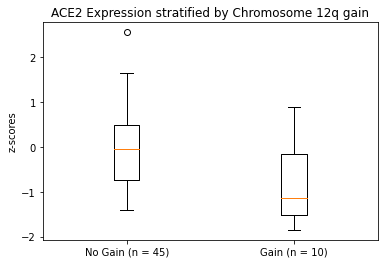

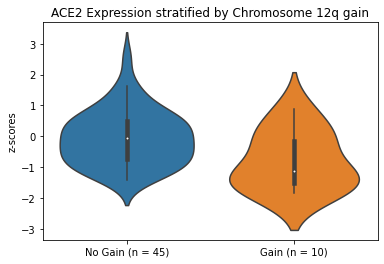

No Gain: median = -0.0544, mean = -0.05538222222222222, 95% CI = (-0.31210860623403847, 0.20134416178959402)
Gain: median = -1.14275, mean = -0.8013999999999999, 95% CI = (-1.3846816705191745, -0.21811832948082543)
Ttest_indResult(statistic=2.398765020478497, pvalue=0.020001219069765656)


In [35]:
#Filter only data for chromosome 12
ch_data = cna_data.loc[cna_data['chrom']=='12']

#Filter only data for chromosome 12q
ch_data = ch_data.loc[ch_data['loc.start']>38200000] #coordinate 38200000 is the end of the centrosome

#Find all loci with log2-ratio > 0.2
ch_loss = ch_data[ch_data['seg.mean']>0.2]

#Only include samples that have substantial CNV gain across the chromosome (>10Mb affected)
ch_loss_filtered = pd.DataFrame(columns=ch_loss.columns)
for sample in ch_loss['ID'].unique():
    sample_df = ch_loss.loc[ch_loss['ID']==sample]
    total_loss_length = sum(sample_df['loc.end']) - sum(sample_df['loc.start'])
    if(total_loss_length >= 10000000):
        ch_loss_filtered = ch_loss_filtered.append(ch_loss[ch_loss['ID'] == sample])
        
#Stratify samples based on chromosome 10 deletion status
ch_loss_samples = ch_loss_filtered['ID'].unique()
ch_non_loss_samples = set(cna_data['ID'].unique().tolist()) - set(ch_loss_samples.tolist())

#Compare ACE2 expression between different groups
compareExpression('ACE2',[ch_non_loss_samples,ch_loss_samples],'Chromosome 12q gain','No Gain','Gain')

        
        
        

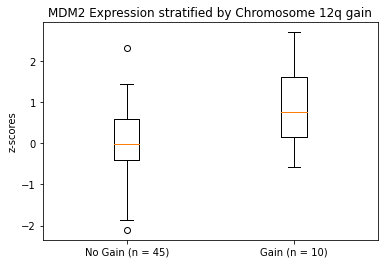

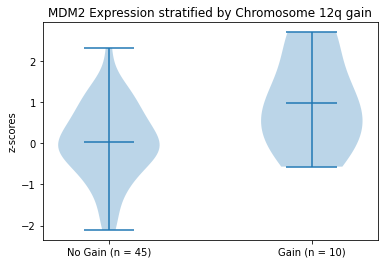

No Gain: median = -0.0286, mean = 0.02646444444444444, 95% CI = (-0.2402492614585859, 0.2931781503474748)
Gain: median = 0.7639, mean = 0.97079, 95% CI = (0.27510617225189105, 1.666473827748109)
Ttest_indResult(statistic=-2.838202452353092, pvalue=0.006416759734785295)


In [127]:
compareExpression('MDM2',[ch_non_loss_samples,ch_loss_samples],'Chromosome 12q gain','No Gain','Gain')


No Gain: median EFS = 932.0, mean EFS = 1497.0204081632653, 95% CI = (1118.5066004241855, 1875.534215902345)
Gain: median EFS = 596.0, mean EFS = 1594.2, 95% CI = (418.5503193994143, 2769.849680600586)
Ttest_indResult(statistic=-0.19293340714948753, pvalue=0.8476969294089705)


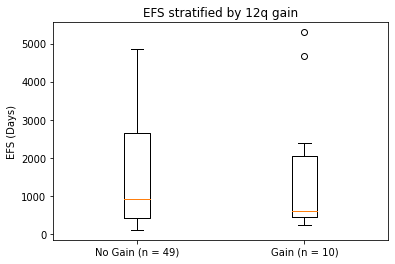

In [128]:
compareEFS([ch_non_loss_samples,ch_loss_samples], 'EFS stratified by 12q gain', 'No Gain', 'Gain')



### Centrosome Coordinates for GRCh37 (hg19)

Obtained from running "curl -s "http://hgdownload.cse.ucsc.edu/goldenPath/hg19/database/cytoBand.txt.gz" | gunzip -c | grep acen" in command line

- chr1	121500000	125000000	p11.1	acen
- chr1	125000000	128900000	q11	acen
- chr10	38000000	40200000	p11.1	acen
- chr10	40200000	42300000	q11.1	acen
- chr11	51600000	53700000	p11.11	acen
- chr11	53700000	55700000	q11	acen
- chr12	33300000	35800000	p11.1	acen
- chr12	35800000	38200000	q11	acen
- chr13	16300000	17900000	p11.1	acen
- chr13	17900000	19500000	q11	acen
- chr14	16100000	17600000	p11.1	acen
- chr14	17600000	19100000	q11.1	acen
- chr15	15800000	19000000	p11.1	acen
- chr15	19000000	20700000	q11.1	acen
- chr16	34600000	36600000	p11.1	acen
- chr16	36600000	38600000	q11.1	acen
- chr17	22200000	24000000	p11.1	acen
- chr17	24000000	25800000	q11.1	acen
- chr18	15400000	17200000	p11.1	acen
- chr18	17200000	19000000	q11.1	acen
- chr19	24400000	26500000	p11	acen
- chr19	26500000	28600000	q11	acen
- chr2	90500000	93300000	p11.1	acen
- chr2	93300000	96800000	q11.1	acen
- chr20	25600000	27500000	p11.1	acen
- chr20	27500000	29400000	q11.1	acen
- chr21	10900000	13200000	p11.1	acen
- chr21	13200000	14300000	q11.1	acen
- chr22	12200000	14700000	p11.1	acen
- chr22	14700000	17900000	q11.1	acen
- chr3	87900000	91000000	p11.1	acen
- chr3	91000000	93900000	q11.1	acen
- chr4	48200000	50400000	p11	acen
- chr4	50400000	52700000	q11	acen
- chr5	46100000	48400000	p11	acen
- chr5	48400000	50700000	q11.1	acen
- chr6	58700000	61000000	p11.1	acen
- chr6	61000000	63300000	q11.1	acen
- chr7	58000000	59900000	p11.1	acen
- chr7	59900000	61700000	q11.1	acen
- chr8	43100000	45600000	p11.1	acen
- chr8	45600000	48100000	q11.1	acen
- chr9	47300000	49000000	p11.1	acen
- chr9	49000000	50700000	q11	acen
- chrX	58100000	60600000	p11.1	acen
- chrX	60600000	63000000	q11.1	acen
- chrY	11600000	12500000	p11.1	acen
- chrY	12500000	13400000	q11.1	acen